**ASSIGNMENT: Convolution Network**

This assignment focuses on utilizing convolutional neural networks (CNNs) to analyze images by identifying and categorizing objects. The goal is to assess the effectiveness of pre-trained networks by evaluating their outcomes.

**To accomplish this, we will download the dataset using an API token from a Kaggle account.**

In [ ]:

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"meenakshivaidhi","key":"b0f63154990bd3bc69a342a1fdf84978"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 97% 788M/812M [00:06<00:00, 257MB/s]
100% 812M/812M [00:07<00:00, 120MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

**Question-1**

Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce overfitting and improve performance in developing a network that you train from scratch. What performance did you achieve?

In this project, we will build a convolutional neural network entirely from scratch. After loading the dataset, we will split it into training, validation, and test sets. Specifically, we will use 1,000 images for training, 500 images for validation, and 500 images for testing.

Dataset Splitting: Training, Validation, and Testing

In [ ]:
import os, shutil, pathlib

original__base_directory = pathlib.Path("train")
new_base_directory = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_directory / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original__base_directory / fname,
                            dst=dir / fname)

make_subset("test", start_index=0, end_index=500)
make_subset("validation", start_index=500, end_index=1000)
make_subset("train", start_index=1000, end_index=2000)

### Building the model

Since the input to this network consists of images, they need to be reshaped accordingly. Convolution is performed using a 3×3 window (kernel_size), while max pooling is applied with a 2×2 window (pool_size).

As the goal of this assignment is image classification, a dense layer is used as the final layer to categorize the output as either "cat" or "dog." To feed data into the dense layer, a flattening layer is required to convert the 3D structure into a one-dimensional format.

**Creating a small convnet for the classification on dogs vs cats**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

From the above summary, there are 991,041 parameters to be optimized.

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Data preprocessing**

**Using `image_dataset_from_directory` to read images**

This code converts images into tensors and organizes them into their respective folders for training, validation, and testing.

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_directory / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_directory / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_directory / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
randomnumbers = np.random.normal(size=(1000, 16))
datasets = tf.data.Dataset.from_tensor_slices(randomnumbers)

In [ ]:
for i, element in enumerate(datasets):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_datasets = datasets.batch(32)
for i, element in enumerate(batched_datasets):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = datasets.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using the `Dataset`**

In this case, we will use "callbacks" to automatically save a file containing the weights from the best epoch, eliminating the need to retrain the model.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 153ms/step - accuracy: 0.4945 - loss: 0.7064 - val_accuracy: 0.5000 - val_loss: 0.7600
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.5505 - loss: 0.6901 - val_accuracy: 0.5140 - val_loss: 0.6859
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.5745 - loss: 0.6757 - val_accuracy: 0.6120 - val_loss: 0.6535
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6160 - loss: 0.6511 - val_accuracy: 0.5580 - val_loss: 0.7324
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6430 - loss: 0.6385 - val_accuracy: 0.6220 - val_loss: 0.6349
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.6656 - loss: 0.6091 - val_accuracy: 0.6870 - val_loss: 0.5871
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.6920 - loss: 0.5687 - val_accuracy: 0.6540 - val_loss: 0.6311
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.6920 - loss: 0.5767 - val_accuracy: 0.6870 

**Plotting the curves of loss of accuracy during training**

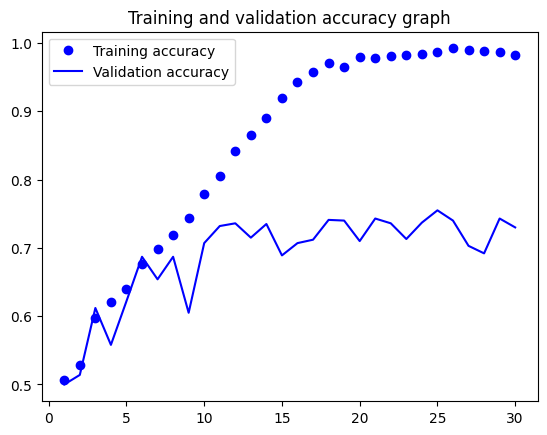

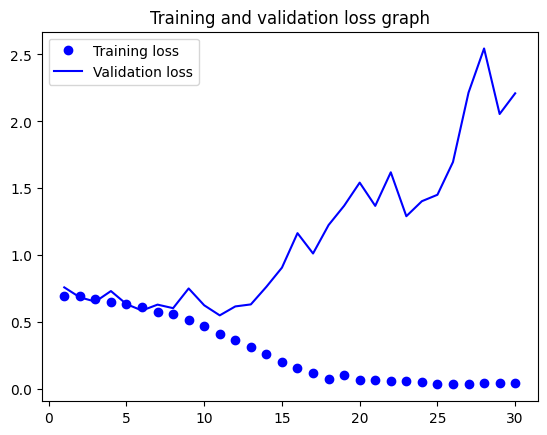

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy graph")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss graph" )
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7818 - loss: 0.4614
Test accuracy: 0.754


The model's validation and test accuracy remain relatively low at 70%.

To improve its performance, the following techniques will be applied during training:

a) Data Augmentation

b) Dropout Method

c) A combination of both Data Augmentation and the Dropout Method



**a)Using Data Augmentation**

Defining a data augmentation stage to add to an image model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
dataaugmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Defining a new convnet that includes image augmentation.

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = dataaugmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the regularized convolution network.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
     callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 96ms/step - accuracy: 0.5065 - loss: 0.7071 - val_accuracy: 0.5040 - val_loss: 0.6922
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5198 - loss: 0.6938 - val_accuracy: 0.5120 - val_loss: 0.6882
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.5635 - loss: 0.6857 - val_accuracy: 0.5020 - val_loss: 0.8524
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5702 - loss: 0.6775 - val_accuracy: 0.6460 - val_loss: 0.6380
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.6237 - loss: 0.6772 - val_accuracy: 0.6060 - val_loss: 0.6725
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.6530 - loss: 0.6486 - val_accuracy: 0.6600 - val_loss: 0.6112
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.6513 - loss: 0.6280 - val_accuracy: 0.5910 - val_loss: 0.7357
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.6645 - loss: 0.6320 - val_accuracy: 0

Evaluating the test dataset

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8191 - loss: 0.4366
Test accuracy: 0.815


**b) Using Dropout method**

Defining a new convolution network that includes dropout.

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the regularized convolution network.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.4926 - loss: 0.7255 - val_accuracy: 0.5000 - val_loss: 0.6947
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.5229 - loss: 0.6996 - val_accuracy: 0.5190 - val_loss: 0.6890
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5743 - loss: 0.6841 - val_accuracy: 0.5120 - val_loss: 0.7764
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6115 - loss: 0.6649 - val_accuracy: 0.5800 - val_loss: 0.7000
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.6332 - loss: 0.6515 - val_accuracy: 0.6370 - val_loss: 0.6285
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.6520 - loss: 0.6150 - val_accuracy: 0.5990 - val_loss: 0.6667
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.6823 - loss: 0.5841 - val_accuracy: 0.6710 - val_loss: 0.6135
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - accuracy: 0.7250 - loss: 0.5616 - val_accuracy: 0.6480 -

Evaluating the test dataset



In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.7802 - loss: 0.5023
Test accuracy: 0.760


**c) Using Image Augmentation and Dropout method**

Defining a data augmentation stage to add to an image model.

In [ ]:
dataaugmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Defining a new convolution network that includes image augmentation and dropout.

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = dataaugmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the regularized convolution network.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_dropout.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4991 - loss: 0.7776 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.4917 - loss: 0.6942 - val_accuracy: 0.5000 - val_loss: 0.7135
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.4967 - loss: 0.7023 - val_accuracy: 0.5070 - val_loss: 0.6921
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5005 - loss: 0.6925 - val_accuracy: 0.5080 - val_loss: 0.6917
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5699 - loss: 0.6841 - val_accuracy: 0.5290 - val_loss: 0.6841
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.5761 - loss: 0.6741 - val_accuracy: 0.6100 - val_loss: 0.6587
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5948 - loss: 0.6658 - val_accuracy: 0.5500 - val_loss: 0.7083
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.6231 - loss: 0.6543 - val_accuracy: 0

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation_dropout.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.8563 - loss: 0.3914
Test accuracy: 0.834


**Q2. Increasing Training sample size to 5000 samples**

The training samples have been increased to 5000 and the model performance has been evaluated and the explanation is provided in the summary.

Among the model performance techniques mentioned, both data augmentation and the dropout method is used, as they have proven effective in improving the model's performance.

In [ ]:
make_subset("train3", start_index=1000, end_index=6000)

train_dataset_3 = image_dataset_from_directory(
    new_base_directory / "train3",
    image_size=(180, 180),
    batch_size=32)

Found 10000 files belonging to 2 classes.


Defining a new convolution network that includes image augmentation and dropout.

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = dataaugmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the regularised convolution network.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_3,
    epochs=70,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.5138 - loss: 0.7727 - val_accuracy: 0.5000 - val_loss: 0.8649
Epoch 2/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.6311 - loss: 0.6415 - val_accuracy: 0.5620 - val_loss: 1.0273
Epoch 3/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7053 - loss: 0.5767 - val_accuracy: 0.7410 - val_loss: 0.5448
Epoch 4/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7685 - loss: 0.4972 - val_accuracy: 0.7190 - val_loss: 0.5380
Epoch 5/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8030 - loss: 0.4352 - val_accuracy: 0.7930 - val_loss: 0.4282
Epoch 6/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8358 - loss: 0.3834 - val_accuracy: 0.8020 - val_loss: 0.4391
Epoch 7/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8564 - loss: 0.3314 - val_accuracy: 0.8510 - val_loss: 0.3365
Epoch 8/70
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8756 - loss: 0.2922 - 

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8460 - loss: 0.3510
Test accuracy: 0.834


**Q3. Increasing the Training samples to 10000 Samples**

Here, the training samples were increased from 5000 to 10000, in order to evaluate the model performance. The observations would be included in the summary.

In [ ]:
#import shutil
#shutil.rmtree('/content/cats_vs_dogs_small/train2')

make_subset("train2", start_index=1000, end_index=11000)

train_dataset2 = image_dataset_from_directory(
    new_base_directory / "train2",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.



**Model Building with Image augmentation and dropout.**


Defining a new convolution network that includes image augmentation and dropout.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
#x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_test3.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset_3,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.5508 - loss: 0.6985 - val_accuracy: 0.6420 - val_loss: 0.6401
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7030 - loss: 0.5887 - val_accuracy: 0.7550 - val_loss: 0.5147
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7464 - loss: 0.5159 - val_accuracy: 0.7640 - val_loss: 0.4967
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7987 - loss: 0.4439 - val_accuracy: 0.7790 - val_loss: 0.4495
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8362 - loss: 0.3812 - val_accuracy: 0.8010 - val_loss: 0.4524
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.8521 - loss: 0.3362 - val_accuracy: 0.8460 - val_loss: 0.3912
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8850 - loss: 0.2756 - val_accuracy: 0.7930 - val_loss: 0.5772
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.9137 - loss: 0.2173 - 

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_test3.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8414 - loss: 0.3676
Test accuracy: 0.836


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = dataaugmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

Training the regularised convolution network.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset2,
    epochs=70,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 49ms/step - accuracy: 0.5625 - loss: 0.6774 - val_accuracy: 0.7260 - val_loss: 0.5344
Epoch 2/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7461 - loss: 0.5258 - val_accuracy: 0.8340 - val_loss: 0.3886
Epoch 3/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8008 - loss: 0.4289 - val_accuracy: 0.8000 - val_loss: 0.4130
Epoch 4/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8478 - loss: 0.3501 - val_accuracy: 0.8680 - val_loss: 0.2870
Epoch 5/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.8781 - loss: 0.2839 - val_accuracy: 0.8860 - val_loss: 0.2613
Epoch 6/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9000 - loss: 0.2456 - val_accuracy: 0.8890 - val_loss: 0.2540
Epoch 7/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9135 - loss: 0.2077 - val_accuracy: 0.8880 - val_loss: 0.2743
Epoch 8/70
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 46ms/step - accuracy: 0.9252 - loss: 0.1854 - 

Evaluating the test data:

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9209 - loss: 0.2028
Test accuracy: 0.917


**Q4.Fine Tuning of the pretrained models**

Using different training sample sizes, we will fine tune the pretrained model and evaluate its performance on the models we built earlier.

**Pre-Trained Model - 1000 Training samples**

Instantiating and freezing the VGG16 convolutional base.

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 180, 180, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 90, 90, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 90, 90, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 45, 45, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 22, 22, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 11, 11, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 5, 5, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Fine-tuning a pretrained model

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

Freezing all layers until the fourth from the last

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Adding a data augmentation stage and a classifier to the convolutional base

In [ ]:
dataaugmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = dataaugmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 263ms/step - accuracy: 0.7541 - loss: 4.0909 - val_accuracy: 0.9340 - val_loss: 0.7629
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 206ms/step - accuracy: 0.8962 - loss: 0.9322 - val_accuracy: 0.9440 - val_loss: 0.4988
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9045 - loss: 0.6379 - val_accuracy: 0.9520 - val_loss: 0.4227
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 227ms/step - accuracy: 0.9323 - loss: 0.4490 - val_accuracy: 0.9580 - val_loss: 0.3075
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.9380 - loss: 0.3077 - val_accuracy: 0.9640 - val_loss: 0.3183
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - accuracy: 0.9535 - loss: 0.2439 - val_accuracy: 0.9640 - val_loss: 0.2506
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 201ms/step - accuracy: 0.9631 - loss: 0.1309 - val_accuracy: 0.9640 - val_loss: 0.2176
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.9612 - loss: 0.1545 - val_accu

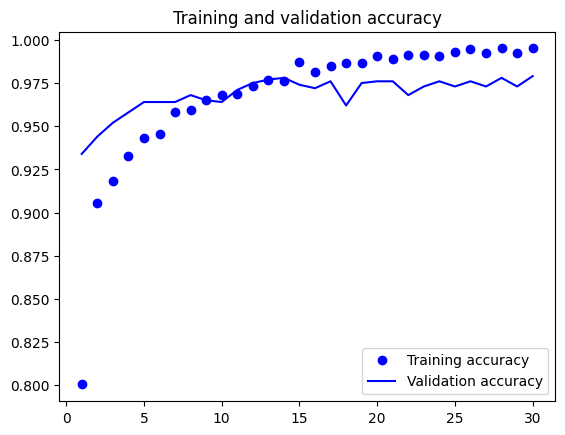

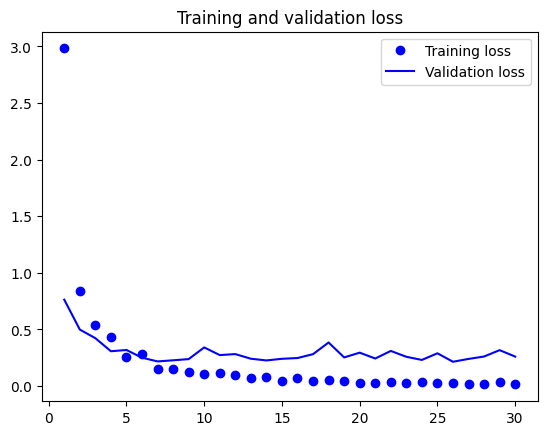

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9848 - loss: 0.1035
Test accuracy: 0.982


**Pre-Trained Model - 5000 Training samples**

Instantiating and freezing the VGG16 convolutional base

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

Fine tuning the pretrained model and freezing the layers

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

Adding a data augmentation stage and a classifier to the convolutional base

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset_3,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 150ms/step - accuracy: 0.7890 - loss: 3.2868 - val_accuracy: 0.9650 - val_loss: 0.1856
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 152ms/step - accuracy: 0.9309 - loss: 0.2650 - val_accuracy: 0.9720 - val_loss: 0.1495
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.9507 - loss: 0.1625 - val_accuracy: 0.9740 - val_loss: 0.1576
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.9593 - loss: 0.1288 - val_accuracy: 0.9780 - val_loss: 0.1369
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 149ms/step - accuracy: 0.9614 - loss: 0.1299 - val_accuracy: 0.9800 - val_loss: 0.1252
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 155ms/step - accuracy: 0.9707 - loss: 0.1052 - val_accuracy: 0.9820 - val_loss: 0.1231
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 145ms/step - accuracy: 0.9684 - loss: 0.0959 - val_accuracy: 0.9760 - val_loss: 0.1826
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 151ms/step - accuracy: 0.9739 - loss: 0

In [ ]:
model = keras.models.load_model("fine_tuning2.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9775 - loss: 0.0928
Test accuracy: 0.980


**Pre-Trained Model - 10000 samples**

Instantiating and freezing the VGG16 convolutional base

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

Fine tuning the pretrained model and freezing the layers

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False


Adding a data augmentation stage and a classifier to the convolutional base

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset2,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 153ms/step - accuracy: 0.8362 - loss: 1.9820 - val_accuracy: 0.9730 - val_loss: 0.1199
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 152ms/step - accuracy: 0.9495 - loss: 0.1421 - val_accuracy: 0.9770 - val_loss: 0.1020
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 142ms/step - accuracy: 0.9619 - loss: 0.1034 - val_accuracy: 0.9800 - val_loss: 0.1084
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 139ms/step - accuracy: 0.9673 - loss: 0.1006 - val_accuracy: 0.9830 - val_loss: 0.1114
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 139ms/step - accuracy: 0.9731 - loss: 0.0786 - val_accuracy: 0.9830 - val_loss: 0.1340
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 139ms/step - accuracy: 0.9749 - loss: 0.0743 - val_accuracy: 0.9840 - val_loss: 0.1316
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 139ms/step - accuracy: 0.9767 - loss: 0.0763 - val_accuracy: 0.9890 - val_loss: 0.1281
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 142ms/step - accuracy: 0.9755 - l

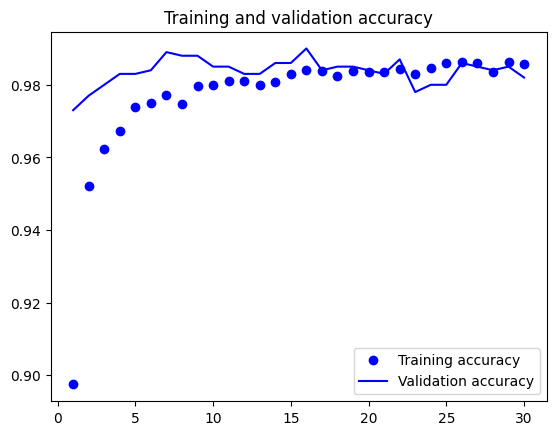

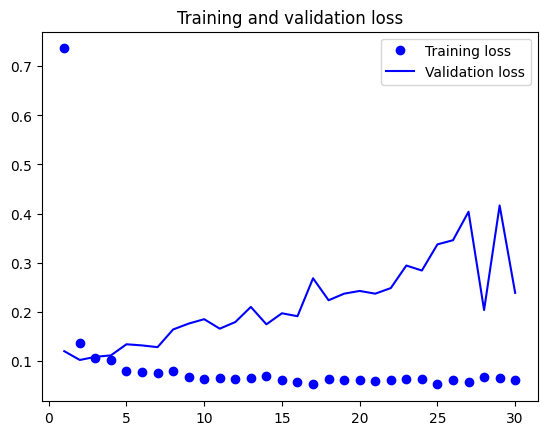

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:

model = keras.models.load_model("fine_tuning3.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9868 - loss: 0.0790
Test accuracy: 0.982
